<center><h1>Kickstarter Success:<br>What Kind of Ideas Get Funded?</h1>

<h3>COGS 108 Final Project</h3></center>


**Team Name:** Team 97<br><br>
**Team Members:** Aidan Keogh (Axxxxxxxx), Amanda Smith (Axxxxxxxx), Brendon Chen (Axxxxxxxx), Daniel Ballard (Axxxxxxxx), Huy Le (Axxxxxxxx), & Krittin Srisajjakul (Axxxxxxxx)

# Introduction:

Startups are centers for innovation as they often use cutting-edge technology to develop new products and services. These small companies also tend to grow quickly and can keep up with a rapidly changing economy. For these reasons, startups are proving to be invaluable in our globally connected economy and it is important that we understand what factors can lead to startup success.  

Unfortunately, CB Insights reports that 9 out of 10 startups fail, where 42% of those unsuccessful startups failed because there was no market need and 29% failed because they lacked sufficient funding. Clearly, many startups struggle with customer discovery and securing funds. As a potential guide for startups, we wanted to analyze what entrepreneurial ideas are most likely to attract customers and funding using a Kickstarter dataset, where Kickstarter is a funding platform for various projects. This dataset contains various fields, including sector and product descriptions, that we can analyze using supervised learning and natural language processing.


# Research Question:

## What keywords in Kickstarter descriptions best indicate high fundraising?

To measure success, we are going to be looking at the total funds raised by a project. The alternative would be to see whether or not a project met its minimum fundraising goal, but our preliminary research showed that within the Kickstarter dataset the fundraising goal had very little impact on the amount of money a Kickstarter campaign actually raises (even projects with small goals often raised 100x their goal). We determined that if we used minimum goal met as our metric the results would be heavily biased towards unambitious projects with small fundraising goals. 

Furthermore, we have decided to break down our analysis by category, for two main reasons 
The meaning of certain words varies heavily between categories (eg, mobile in ‘gaming’ means mobile game app, whereas ‘mobile’ in fashion indicates that a piece of clothing is not restricting)
There is a large difference in average funds raised between categories, so the ‘most important keywords’ would likely just end up being indicators of which category a project belongs to. (For instance, ‘tech’ words might all be far higher than ‘journalism’ words.)  


# Background and Prior Work

Kickstarter began in April 2009 as a platform through which anyone can post their projects and receive funding from the masses. Oftentimes, entrepreneurs use the site as a means to bring their product innovations to market. Kickstarter requires that the entrepreneur sets a specific funding goal, and users can then “back” the project by pledging a dollar amount. If the total amount raised meets or exceeds the project target, then the entrepreneur gets to keep the pledged amount. Otherwise, the funds are returned to the investors.

As mentioned in the previous section, we plan to investigate which sort of entrepreneurial ideas will likely garner crowdfunding via Kickstarter. For our purposes, we will be using a dataset scraped by Web Robots that contains information, including funding goals and amount raised, on all Kickstarter projects as of 2019. This dataset also provides fields concerning project descriptions and business categories (or sectors) that we hope our model will be able to analyze. We plan on modeling the entrepreneurial idea by combining the category of the project with language features extracted from the title and description.

It is important to note that teams in the private sector and in research have tried to model startup success before. In 2016, researchers at Northwestern University set out to predict the outcome of startups based on factors like seed funding amount, seed funding time, Series A funding with the belief that these factors contribute to the success and failure of a company at every milestone (see "Predicting The Outcome of Startups: Less Failure, More Success"). To predict success/failure of early-stage startups, the team used various supervised learning classifiers, such as Random Forest and Bayesian Networks, and achieved precision accuracies ranging from 85% to 96%.

Although our project idea may be similar to the Northwestern University research project, they use early funding to predict startup long term success; however, we will be using features relating to the startup idea itself to predict early funding. Additionally, rather than a binary classification for success vs. failure, we plan on using a regression model to predict the amount a startup will raise. Ultimately, we hope that our model’s predictions will help us draw conclusions on what ideas can attract people to fund a Kickstarter project. 





# Hypothesis

Among venture capitalists, new research in artificial intelligence and machine learning are extremely popular. So, our hypothesis is that such ideas would do very well on Kickstarter, even in categories outside of tech (for instance, AI created music). However, it is entirely possible that Kickstarter users have very different priorities compared to venture capitalists.

# Dataset(s)

The dataset is aptly named *Kickstarter Datasets*, and it contains 209,222 Kickstarter campaigns scraped by webrobots.io during 2019. A download link can be found at https://webrobots.io/kickstarter-datasets/

However, note that in the cell below we have included a link to our already pre-processed dataset, as our pre-processing took a substantial amount of time. 

The data is just over 1.1GB and is in a CSV file format. It contains both semi-structured and unstructured data that can be used for analysis. These two categories can be summarized below:

### Unstructured
| Field                              || Example                     |
| ---------------------------------- || --------------------------- |
| Name of campaign/product           || "Deep Learning Mini-Degree" |
| Short campaign/product description || “Master Machine Learning with <br>Python and Tensorflow. Craft<br> Advanced Artificial Neural<br> Networks and Build Your <br>Cutting-Edge AI Portfolio” |


### Semi-Structured
| Field                                    || Example                     |
| ---------------------------------------- || --------------------------- | 
| Funds raised (USD)                       || 18571.00                    |
| Fundraising goal (USD)                   || 500.00                      |
| Number of unique backers                 || 251                         |
| Location of the founder (Country / City) || Australia / Brisbane        |
| Broad and narrow categories for campaign || Technology / Software       |
<br><br>
From the name and description fields, language features can be extracted using a Python library, such as NLTK, to see if there are potentially specific words or phrases that indicate fundraising success. For example, does the phrase “machine learning” appear in the descriptions of successful startups? Other fields like category (aka business sector) and location can be represented as one-hot encodings with similar goals.

Here, entrepreneurial ideas can be described in general by the business sector as well as language features extracted from the title and description, and fundraising success can be determined by the funds raised in relation to fundraising goals.
<br>

# Data Cleaning - Part 1


The below code reads in the raw CSV Kickstarter data and then does each of the following: 
> 1. Removes stopwords and punctuation
> 2. Lemmatizes all words (eg mice -> mouse, running -> run)
> 3. Writes the processed data to JSON format

Lemmatization is a fairly intensive task and with a dataset of over 200,000 this needed to run overnight. 

Therefore, we recommend that you skip this cell and work off of the already lemmatized JSON outputs included in the repository.

You can find the already processed data at https://github.com/Aidankeogh/Cogs108_Repo in the folder "kickstarter_data".

In [1]:
already_preprocessed = True

if not already_preprocessed: 
    import pandas as pd
    import json
    import glob
    import random
    import string
    import spacy
    import nltk
    
    from nltk.corpus import stopwords
    
    nlp = spacy.load("en_core_web_sm")
    stopwords = set(stopwords.words('english') + list(string.punctuation))

    # Read in all of the CSV files, concatenate them into one dataset 
    csv_files = glob.glob("kickstarter_data/Kickstarter*")
    subsets = []
    
    for csv_file in csv_files:
        subsets.append(pd.read_csv(csv_file))
    dset = pd.concat(subsets)

    # Take in text and return an array of lemmatized, tokenized, and 
    # stopword-removed word features
    def text_features(text):
        text = text.strip().replace("\n", " ").replace("\r", " ")
        text = text.lower()
        
        tokens = nlp(text)
        feats = []   
        
        # Lemmatize words that are not pronouns
        for tok in tokens:  
            feats.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
        feats = [feat for feat in feats if feat not in stopwords]
        
        return feats

    # Goes through every Kickstarter project in the dataset, and 
    # writes it back to disk in json format. 
    dump = 0
    projects = []
    
    for idx, item in dset.iterrows():
        
        project = {'pledged' : item['pledged'] * item['fx_rate'],
                   'goal'    : item['goal'] * item['fx_rate'],
                   'category': json.loads(item['category'])['slug'].split("/"), 
                   'text'    : str(item['name']) + " " + str(item['blurb']),
                   'text_feats': text_features(str(item['name']) + " " + str(item['blurb']))}
        
        projects.append(project)
        
        if idx % 1000 == 999:
            
            with open('kickstarter_data/data' + str(dump) + '.json', 'w') as outfile:  
                json.dump(projects, outfile)
                dump += 1
                projects = []
                

# Data Cleaning - Part 2

Below are all the functions needed to convert the lemmatized/tokenized word features into a usable format for scikit-learn's regression models. Note that all functions have a description above their cells.

Intended usage is to start running from here, downloading the JSON formatted features that are inside the repository. 

(See **Data Cleaning - Part 1** above to access said repository).

In [2]:
import json
import glob
import nltk
import random

# A constant for the top most useful uni-, bi-, and trigrams
# Edit this to use more or less of each gram type. 
most_useful = {"uni": 200, "bi": 100, "tri": 0}

**read_data ()**<br><br>
This function reads in the entire Kickstarter dataset from json files in the "kickstarter_data" directory.
> **return:**
    An *nx5* list of projects, where n represents the total number of projects. Note that there are 5 attributes of a single project: the category, text, pledged amount, goal amount, and text_features.

In [3]:
def read_data():
    projects = []

    # Read in data
    json_files = glob.glob("kickstarter_data/data*")

    for json_file in json_files:
        projects += json.load(open(json_file, 'r'))

    return projects  


**grams_by_project (*List text*)**<br><br>
This function will find all the unigrams, bigrams, and trigrams in the given *text*.
> **return:**
    A dictionary containing all unigrams, bigrams, and trigrams, 
    where the corresponding keys are "uni", "bi" and "tri"

In [4]:
def grams_by_project(text):
    grams = {}
    
    all_words = []
    all_bigrams = []
    all_trigrams = []
    
    prev_prev = ''
    prev_word = '<SOS>' # Start of sentence

    for w in text:
        # Ignore empty strings and apostrophe+s ending
        if w == "'s" or w == '’s' or w == '' or w == 'cancel':  
            continue

        all_words.append(w)
        all_bigrams.append(prev_word + " " + w)

        if prev_prev != '':
            all_trigrams.append(prev_prev + " " + prev_word + " " + w)

        prev_prev = prev_word
        prev_word = w
    
    grams["uni"] = all_words
    grams["bi"]  = all_bigrams
    grams["tri"] = all_trigrams
    
    return grams

**grams_by_category (*string category*, **[optional]** *int n*, **[optional]** *boolean do_print*)**<br><br>
This function will find the unigrams, bigrams, and trigrams in the given *category*. If *do_print* is set, then the *n* most common unigrams, bigrams, and trigrams will be displayed.
> **return:**
    A dictionary containing all unigrams, bigrams, and trigrams, 
    where the corresponding keys are "uni", "bi" and "tri"

In [5]:
def grams_by_category(projects, category, n=15, do_print=True):
    grams = {}
    
    all_words = []
    all_bigrams = []
    all_trigrams = []
    
    for project in projects:
        
        # Change this to check out a different sub-category, 
        # 'all' will check the entire thing
        if category != 'all' and category not in project['category']: 
            continue

        prev_prev = ''
        prev_word = '<SOS>' # Start of sentence
        
        proj_grams = grams_by_project(project['text_feats'])
            
        all_words += proj_grams["uni"]
        all_bigrams += proj_grams["bi"]
        all_trigrams += proj_grams["tri"]
        
    grams["uni"] = nltk.FreqDist(all_words)
    grams["bi"]  = nltk.FreqDist(all_bigrams)
    grams["tri"] = nltk.FreqDist(all_trigrams)
    
    if do_print:
        print("-- UNIGRAMS --")
        all_words = nltk.FreqDist(all_words)
        
        for word in all_words.most_common(n):
            print(word[0], "\t", word[1])

        print()
        print("-- BIGRAMS --")
        all_bigrams = nltk.FreqDist(all_bigrams)
        
        for bigram in all_bigrams.most_common(n):
            print(bigram[0], "\t", bigram[1])

        print()
        print("-- TRIGRAMS --")
        all_trigrams = nltk.FreqDist(all_trigrams)
        
        for trigram in all_trigrams.most_common(n):
            print(trigram[0], "\t", trigram[1])
    
    return grams

**map_gram_to_idx (*Dictionary grams*, **[optional]** *int num_uni*, **[optional]** *int num_bi*, **[optional]** *int num_tri*)**<br><br>
Given a dictionary of unigrams, bigrams, and trigrams, this function maps each gram to a unique index. We will later use this to vectorize the most unique uni-, bi-, and trigrams. Note that *num_uni* represents the "n" most common unigrams, and similarily for *num_bi* and *num_tri*.
> **return:**
    A dictionary containing all unigrams, bigrams, and trigrams mapped to a unique integer index.

In [6]:
def map_gram_to_idx(grams_dict, num_uni=most_useful["uni"], 
                      num_bi=most_useful["bi"], 
                      num_tri=most_useful["tri"]):
    gram_to_idx = {}
    count = 0
    
    for word, _ in grams_dict["uni"].most_common(num_uni):
        gram_to_idx[word] = count
        count += 1

    for phrase, _ in grams_dict["bi"].most_common(num_bi):
        gram_to_idx[phrase] = count
        count += 1

    for phrase, _ in grams_dict["tri"].most_common(num_tri):
        gram_to_idx[phrase] = count
        count += 1
        
    return gram_to_idx

**vectorize (*Dictionary project*, *Dictionary gram_to_idx*)**<br><br>
For each uni-, bi-, and trigram in *project['text_feats']*, this function will indicate whether each gram is present in *gram_to_idx* (1: present; 0: not present). Note that *gram_to_idx* represents a mapping of the n most common uni-, bi-, and trigrams of a particular project category.
> **return:**
    A list of 0s and 1s, where 0 indicates that the gram found at *gram_to_idx[i]* is not present in *project['text_feats']* and 1 means that the gram is present.

**Note**

We are intentionally using a word presence vector over the more common bag-of-words and tfidf vectors as it performed better for our analysis. We believe this is due to the fact that most words that our algorithm highlighted were indicators of what type of a product was being developed.

If the word 'documentary' is found once in a project description, it stands to reason that the project is going to be a documentary, and documentaries on average make 5,000 more than the average film. If the word 'documentary' is present twice, it doesn't stand to reason that extra 5,000 would stack and film would make 10,000 more than average. 

Essentially, we felt that the additive nature of bag of words and TFIDF was detrimental in this context, the first time a word is mentioned is very useful, but subsequent mentions of the same word are not. 

In [7]:
def vectorize(project, gram_to_idx):
    text  = project['text_feats']
    feats = [0] * (len(gram_to_idx) + 1)
    
    feats[-1]  = project['goal']
    proj_grams = grams_by_project(text)
        
    for _, grams in proj_grams.items():
        
        for g in grams:
            if g in gram_to_idx:
                feats[gram_to_idx[g]] = 1
               
    return feats

# Data Analysis

We have provided all the necessary functions to 1) build both our training and testing sets, and 2) train our model. Like the functions above, each function has a short description above its definition. 

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

**build_feats (*List projects*, *string category*)**<br><br>
This function acts as a helper function to the following function **create_model**. It builds the features and labels sets that will be used for training and validating the model. The features set, or *feats*, contains vectorized arrays, where each vectorized array represents a single project description. And the label corresponding to each feature is a monetary amount that investors pledged to the startup.

> **return:** Each return is summarized below:<br> 
- *idx_to_grams* is a list where each *idx_to_grams[i]* represents a mapping to index *i*<br><br>
- *feats* is a list of vectorized lists, where each vectorized list corresponds to a project description<br><br>
- *labels* is a list such that each label represents the total dollar amount that investors pledged to the project

In [9]:
def build_feats(projects, category):
    
    # Find and print most common unigrams and bigrams in category
    grams = grams_by_category(projects, category, do_print=False)

    # Map grams to unique index for easy vectorization
    grams_to_idx = map_gram_to_idx(grams)

    # Map unique index to gram to quickly convert vectorization to txt
    idx_to_grams = [0] * len(grams_to_idx)

    for gram, idx in grams_to_idx.items():
        idx_to_grams[idx] = gram
        
    # Build feats + labels for model training
    feats = []
    labels = []

    for project in projects:
        if project['category'][0] == category or category == 'all':
            encoding = vectorize(project, grams_to_idx)

            # Label represents amt pledged
            label = project['pledged']

            feats.append(encoding)
            labels.append(label)
            
    return idx_to_grams, feats, labels

**create_model (*List projects*, *string category*,** [optional] ***boolean validate*)**<br><br>
This function trains a Ridge Regression model on all of the *projects* from a specified *category*. If *validate* is set to **True**, then the model will be validated against its test sets and compute the mean squared error (MSE). The MSE value will be printed to the screen.

> **return:**
This function returns a trained *model* and a list titled *word_corrs*. *word_corrs* represents the gram correlations that the model learned, ordered from most significant gram with the highest monetary impact to the least significant gram with the lowest monetary impact.

In [10]:
def create_model(projects, category, validate=False):
            
    idx_to_grams, feats, labels = build_feats(projects, category)
            
    # 90-10 split feats and labels; 90% training data and 10% test data
    feats_train = feats[:int(len(feats) * .9)]
    feats_test  = feats[int(len(feats) * .9):]

    labels_train = labels[:int(len(labels) * .9)]
    labels_test  = labels[int(len(labels) * .9):]
    
    model = linear_model.Ridge(alpha=1000)     # Initialize model
    model.fit(feats_train, labels_train)       # Train model
    
    # If validate=True, then validate model using 10% of data
    if validate:
        predictions = model.predict(feats_test)
        
        MSE = mean_squared_error(predictions, labels_test)
        print("MSE:", MSE)
        
    word_corrs = sorted(zip(idx_to_grams, model.coef_), key=lambda t: -t[1])
        
    return model, word_corrs

With all of our functions defined, we will now load in all of the data, and then find the top 10 most common Kickstarter categories to analyze. 

We made the decision to limit analysis to category by category so that we could get a more fine-grained description, indicating what kinds of projects are the most appealing for each category. 

In [11]:
projects = read_data()

In [12]:
all_categories = []

# Get list of all possible categories
for project in projects:
    for category in project['category']:
        all_categories.append(category)
        
all_categories = nltk.FreqDist(all_categories)

# Get top-10 categories
top_10_categories = [category[0] for category in all_categories.most_common(10)]

We can see the categories with the the most Kickstarter projects by printing *top_10_categories*

In [13]:
print(top_10_categories)

['film & video', 'music', 'technology', 'art', 'publishing', 'food', 'games', 'fashion', 'design', 'comics']


And now that we have the top 10 most common categories, we can train a model for each category and determine the gram correlations (for both uni- and bigrams) from said category

In [14]:
grams = {}
coefs = []

for category in top_10_categories:
    temp = {}
    
    # Train model
    LR, corrs = create_model(projects,category)
    
    # Build grams_df and coefs_df
    temp['grams'] = [t[0] for t in corrs]
    temp['monetary_impact'] = [t[1] for t in corrs]
    
    coefs.append([category, LR.intercept_,LR.coef_[-1]])
    
    grams[category] = pd.DataFrame(temp)

In [15]:
grams_df = pd.concat(grams, axis=1, keys=top_10_categories)
coefs_df = pd.DataFrame.from_records(coefs,
                                     index='category',
                                     columns=['category', 'intercept', 'goal_v_raised'])

*grams_df* contains a list of learned grams (unigrams and bigrams) from each category, ordered from most significant with the highest monetary impact to the least significant with the lowest monetary impact.

For example, we can access the most significant gram in the *music* cateogry, i.e. 'new' using:

```python
grams_df['music']['grams'][0]
```

and we can retrieve the corresponding monetary impact with:

```python
grams_df['music']['monetary_impact'][0]
```

*coefs_df* contains the following *intercept* and *goal_v_raised* fields for each category. 

*intercept* indicates the monetary amount that a project from said category can expect to make if they did not enter any sort of description. Whereas, *goal_v_raised* represents the averge increase in dollars raised for every &#36;1,000 added to the goal amount. Both *intercept* and *goal_v_raised* are determined by our classifier.

For example, we can retrieve the intercept value for the food category with:

```python
coefs_df['food']['intercept']
```

A similar method can be used to get the *goal_v_raised* value

# Results


In [16]:
coefs_df.style

,intercept,goal_v_raised
category,,
film & video,11125.3,0.000225505
music,3709.55,0.00226038
technology,31077.3,0.000883642
art,3804.75,6.2063e-05
publishing,5532.09,0.00057816
food,6699.85,-4.09063e-05
games,29322.1,0.00566472
fashion,12672.9,0.00270984
design,33397,-0.000157506


First let us analyze the coefficients above. 

The values you see in the cell above was a large reason our analysis chose to focus on one category at a time, and to choose total funds raised over whether a project met their fundraising goal.

We can see that the intercepts are vastly different depending on project category, meaning with a blank description an art project would be expected to raise around 1/10th as much as a project under tech. We figured that if we analyzed all projects together, it would leave us with words that simply indicated which category a project belonged to, rather than our real goal of finding out what types of projects consumers are interested in. 

Additionally, we can see that for most categories, the fundraising goal had very little impact on the funds raised. This in itself is important information, basically what this is saying is that what a project sets its fundraising goal to has almost no impact on how much the project will actually raise. This is not incredibly surprising, as it's common to see projects with small goals raise 100x their goal, and for high goaled projects to make less than 1/100th of theirs.

The one exception to this rule is in Comics, where each dollar added to the goal predicts a 23 cent increase in funding. We found that some established comic book artists were using the platform for fundraising large projects. We think that the difference for comics is that the fundraising goal is a good predictor for whether or not a project is being led by an already established artist. 

In [17]:
grams_df.style

In [18]:
category_of_focus = 'technology'

In the below three cells, we can see some preliminary analysis of the monetary impacts of our unigrams and bigrams (essentially, how much a word increases expected Kickstarter funding)

We can see that it appears to follow a roughly left skewed normal distribution. Essentially indicating that the vast majority of words do not have a huge impact on funding, but a few words for each distribution have a very large positive or negative effect on funding. 

For this reason, we are going to analyze the top 5 and bottom 5 words for each category (in terms of funds raised) below. See **plot_top5_vs_bot5()** in cell 22

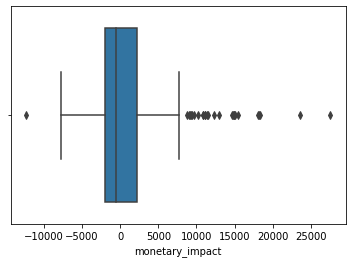

In [19]:
grams_df_by_cat = {}

for cat in top_10_categories:
    grams_df_by_cat[cat] = grams_df[cat]
    
sns.boxplot(x='monetary_impact', 
            data=grams_df_by_cat[category_of_focus])


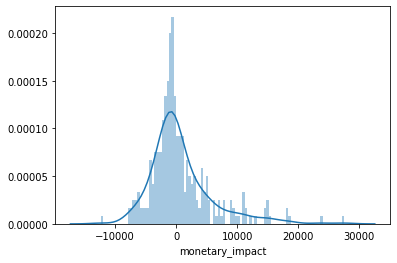

In [20]:
sns.distplot(grams_df_by_cat[category_of_focus]['monetary_impact'], bins=100)


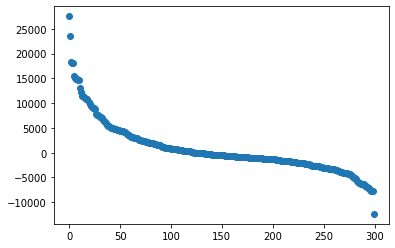

In [21]:
plt.scatter(grams_df_by_cat['technology'].index, 
            grams_df_by_cat['technology']['monetary_impact'])


Now, we will analyze the grams learned by each model across the *top_10_categories*

The following function will be used to plot the most impactful grams versus the most detrimental grams per category. Further discussion of this function is below.

**plot_top5_vs_bot5 (*DataFrame grams_df*, *string category*)**<br><br>
This function displays the top-5 and bottom-5 grams (being either uni- or bigrams) in a bar graph for the given *category*. The top-5 grams are determined to have the highest monetary impact on the amount raised; whereas, the bottom-5 grams detract the most monetary amount from the amount raised.
> **return:**
    N/A

In [22]:
def plot_top5_vs_bot5(grams_df, category):
    # Parameters of bar plots
    title = category.upper()
    title += ': Grams vs. Their Expected Monetary Impact on Total Amount Raised' 
    
    title_pos = [.5, 1.08]                 # Position of title

    x_lab = 'Grams'                        # X label
    y_lab = 'Monetary Impact (in USD)'     # Y label

    x_lab_rot = 45                         # Rotation of X labels

    legend_lab = ['Top 5 Grams', 'Bottom 5 Grams']     # Legend labels

    bar_trans = 0.7     # Transparency of each bar
    bar_width = 0.8     # Width of each bar
    
    bar_color = list('b' * 5) + list('r' * 5)          # Colors of each bar
    # END OF parameters    
    
    n = len(grams_df[category]['grams'])

    x_top5 = grams_df[category]['grams'][:5].tolist()         # 5 most common grams
    x_bot5 = grams_df[category]['grams'][(n - 5):].tolist()   # 5 least common grams

    # Labels corresponding to 5 most common grams
    y_top5 = grams_df[category]['monetary_impact'][:5].tolist()  
    # Labels corresponding to 5 least common grams
    y_bot5 = grams_df[category]['monetary_impact'][(n - 5):].tolist()  

    x = x_top5 + x_bot5
    y = y_top5 + y_bot5

    bar = plt.bar(x, y, width=bar_width, color=bar_color, alpha=bar_trans)
    plt.axhline(0, color='black')               # Display horizontal axis      
    plt.title(title).set_position(title_pos)    # Position title relative to plot
    
    # Display legend with colors corresponding to labels
    plt.legend([bar[:5], bar[5:]], legend_lab)  
    
    plt.xlabel(x_lab)    # Display x label 
    plt.ylabel(y_lab)    # Display y label
    
    plt.xticks(x, rotation=x_lab_rot)           # Rotate x labels
    
    plt.show()           # Display final plot

Below, we have ploted the top 5 and bottom 5 grams from each category

### Film & Video

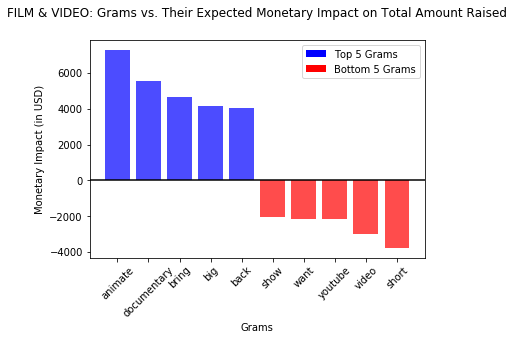

In [23]:
plot_top5_vs_bot5(grams_df, top_10_categories[0])

Above you can see the top 5 predictors for film & video

Immediately we can see useful words like Animate (lemma for animation, animated, etc.) and Documentary, showing us that animated movies and documentaries have done well on the platform. 

On the negative end, we can see how, youtube, video, and short. This indicates to us that small scale / short films are not in high demand. (A quick look over the website suggest that the vast majority of projects are small scale short videos). For film and video, Kickstarter users seem to want to go big or go home. 

### Games

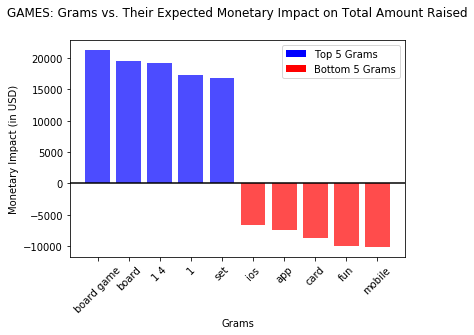

In [24]:
plot_top5_vs_bot5(grams_df, top_10_categories[6])

Games is one of the most interesting categories for us. You can clearly see board and board game, but 1 and 1 4 might be interesting. We looked into it and and that comes from '1-4 player' meaning multiplayer video games. Co-op and couch co-op were also in the top 10. 

The negatives are much more clear, people don't like mobile and card games. 

It seems people really want more board and local multiplayer games, and less mobile games. 

### Music

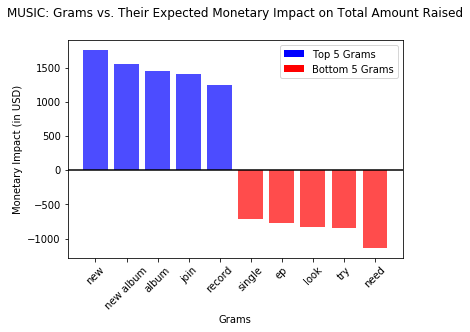

In [25]:
plot_top5_vs_bot5(grams_df, top_10_categories[1])

### Technology

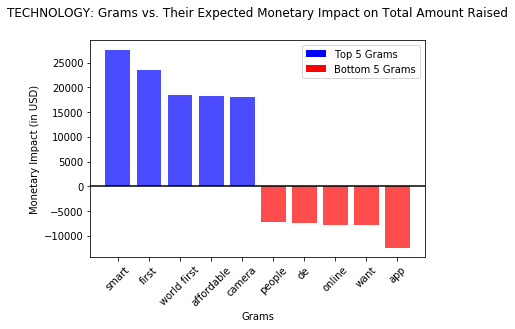

In [26]:
plot_top5_vs_bot5(grams_df, top_10_categories[2])

Our hypothesis about AI being popular wasn't completely off the mark, but most AI applications on Kickstarter are titled 'smart devices'. Here, people seem to be interested in innovation. 

In the bottom 10 along with app, online, and people we also say 'social' and 'networking'. It seems like the site gets a lot of social media apps that don't do well. 

### Art

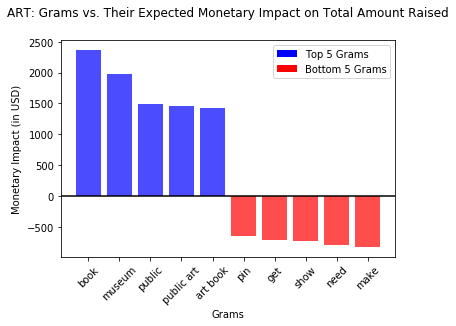

In [27]:
plot_top5_vs_bot5(grams_df, top_10_categories[3])

### Publishing

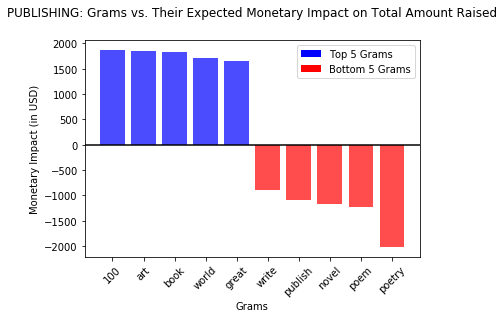

In [28]:
plot_top5_vs_bot5(grams_df, top_10_categories[4])

100 was a bit interesting, but we investigated it and it comes from a series that Kickstarter did called 'build 100 x', where the goal was to make 100 short stories, 100 pictures, 100 comics, etc. This seemed to do particularly well on publishing. 

Also, just like me in 8th grade, Kickstarter hates poetry. 

### Food

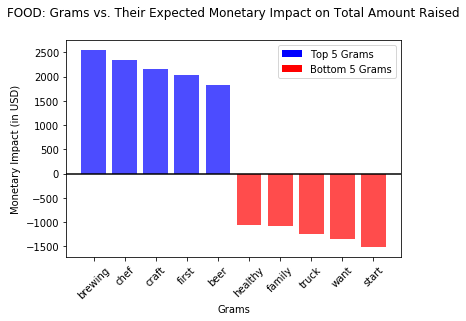

In [29]:
plot_top5_vs_bot5(grams_df, top_10_categories[5])

Kickstarter likes beer more than health food. 

### Fashion

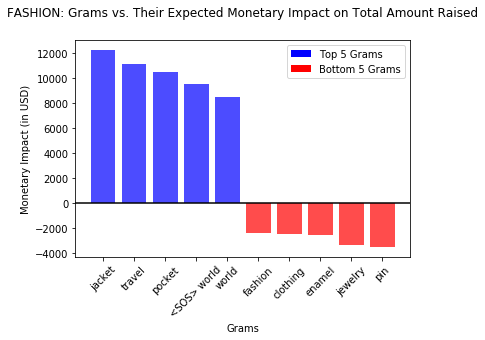

In [30]:
plot_top5_vs_bot5(grams_df, top_10_categories[7])

### Design

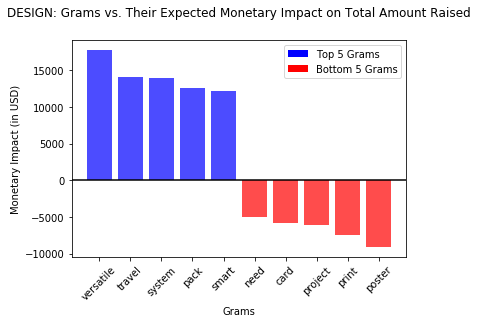

In [31]:
plot_top5_vs_bot5(grams_df, top_10_categories[8])

### Comics

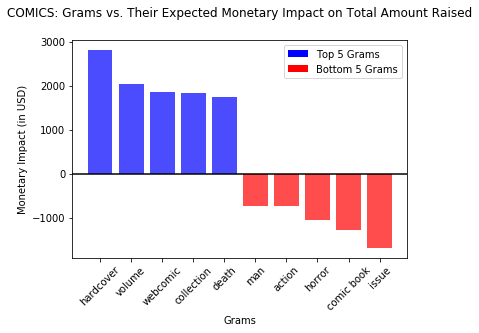

In [32]:
plot_top5_vs_bot5(grams_df, top_10_categories[9])

As we were mentioning before, a lot of these words are associated with already established comics (hardcover, volume, collection). 

The success of webcomics is interesting, we also noticed that the use of 'hardcover' was commonly used with hardcover versions of webcomics. Meanwhile a lot of traditional comic styles (_ Man, action, horror) comics are doing poorly. 

# Ethics & Privacy 

### Collection Bias:   
It is important to remember that this is specifically a dataset of Kickstarter users, who are not necessarily representative of the overall population. Kickstarter is a crowdfunding website, and its users are exclusively people who are willing to invest in a project that may not come to fruition for years, or perhaps ever. As such, participation in Kickstarter funding is going to be limited to people with both the wealth necessary to make that kind of investment. Furthermore, since Kickstarter is an online resource, demographics will again be skewed towards typical web users. Therefore, this should not necessarily be viewed as the needs of the population overall, but rather skewed towards the needs of people who are relatively wealthy and web-savvy.

### Informed Consent and PII:  
All information is scraped from Kickstarter projects that were intentionally made public with the goal of fundraising. Furthermore, for our analysis we only use the aggregate values of the most common 200 unigrams and bigrams, which means we will only be analyzing keywords that were present in thousands of different campaigns. For this reason it is difficult to imagine how any of the results could be used to personally identify individuals or their campaigns. 

### Unintended Use:   
One potential abuse of this information is for people to create fake Kickstarter projects for the sole purpose of raising money, by using the most popular keywords. However, there is far more to a successful Kickstarter than just the description, and we find that just with this analysis alone it would be difficult to trick investors. 


# Conclusion


By extracting word features from Kickstarter descriptions we were able to train a linear classifier to predict the words that best indicate fundraising success.

We found a number of differences between categories, such as technology projects having much higher fundraising averages than art projects. Additionally, for projects outside of comic books we discovered that there is almost no relation between the fundraising goal and the actual funds raised. 

By analyzing the best and worst words for each category, we were able to identify a number of potentially interesting trends. Most of the top and bottom words indicated clear types of products being developed, and the ones that were not immediately obvious (like 1-4 player games) made sense after further investigation. Some categories, like gaming, showed very clear trends away from certain genres (mobile games) favoring instead multiplayer board and video games. 

Hopefully this information is useful for aspiring entrepreneurs in a variety of fields. Thanks for reading. 